## Term Project Final-report

#### 소프트웨어융합학과 2018103258 임형준


### 1. 주제 및 선정 이유
* **주제** : KBO 프로야구 선수들의 성적을 토대로 게임 내에서 합당한 선수카드의 능력치 설정하기
* **주제 선정 이유** : 게임 내에서 선수 카드의 능력치 설정에 실제 기록을 제대로 반영하여 적용하지 않은 경우가 있을 것이라고 생각했기 때문이다.


### 2. 가설 정의

- 가설 1) 야구 게임 "마구마구" 의 경우 한 시즌 간 선수들의 능력치를 제대로 반영하여 선수카드 능력치를 측정하지 않은 경우가 존재 할 것이다.

- 가설 2) 인기팀 (인기 선수)의 경우 유사한 기록을 가진 혹은 더 좋은 성적을 가진 선수보다 더 높은 능력치를 부여받은 경우가 있을 것이다.


### 3. 데이터 획득
* 가설을 증명하기 위해서 스탯티즈 홈페이지 (http://www.statiz.co.kr/main.php) 에 존재하는 시즌 기록에서 타격, 수비의 기록 표를 txt 파일로 만든 이후 파이썬의 readlines를 통해서 데이터를 읽어 와서 리스트로 정리하는 방식을 사용했다.


In [2]:
'''
데이터 획득 코드
'''
class ReadDate:
    def __init__(self, filename):
        f = open(filename, "r", encoding='utf-8')
        self.lines = f.readlines()
        self.player = [] # 선수 넣는 리스트
        self.colsize = 0 # colsize계산

    def makePlayerList(self):
        for line in self.lines:
            line = line.split()
            self.player.append(line)
            self.colsize+=1

    def getPlayerList(self):
        return self.player

    def getColsize(self):
        return self.colsize

### 4. 데이터의 가공
#### 1) 2021년도 선수들의 기록 분석을 통한 게임 능력치 설정
* data01.txt 사용
  * 해당 데이터는 2021년도 선수들 (150명)의 타격 일반, 비율 기록이 저장되어 있다.
* 계산 방식
  1) 전체 선수들의 데이터를 통해 평균, 최대, 최소 값을 구한다.
  2) 측정하려고 하는 선수의 기록이 평균보다 낮은지 높은지를 구한다.
  3) 최대값과 평균 사이의 값, 최솟값과 평균 사이의 값을 나누어 가중치를 부여하여 측정하려는 선수의 가중치를 구한다. (평균보다 높다면 + 가중치, 낮다면 - 가중치)
  4) 마구마구 내의 평균 능력치를 70으로 가정하고, 위에서 계산한 가중치를 70에 더하여 게임 능력치를 측정하였다.
* 파워
  * 선수의 홈런과 장타율을 통해 능력치를 설정했다.
  * 홈런 가중치와 장타율 가중치는 2:1 비율로 부여하여 파워 능력치를 설정했다.
* 스피드
  * 선수의 도루 갯수, 도루 성공률, 병살타 갯수를 통해 능력치를 설정했다.
  * 도루 갯수와 도루 성공률은 + 값이지만 병살타 갯수는 - 값으로 계산했다.
  * 도루 갯수 가중치와 도루 성공률, 병살타 가중치를 2:1:2 비율로 부여하여 스피드 능력치를 설정했다.
* 컨텍트
  * 타율과 출루율을 통해 능력치를 설정했다.
  * 타율과 장타율의 가중치는 1:1의 비율로 부여하여 컨텍트 능력치를 설정했다.
  <br/><br/>
* IF.txt, OF.txt 사용
  * 해당 데이터는 2021년도 선수들의 수비 기록이 저장되어 있다.
  * 내야수와 외야수의 수비, 스로잉 능력치를 측정함에 있어서 차이점이 있기 때문에 따로 데이터를 나눠서 저장하였다.
* 계산 방식
  * 파워 스피드, 컨텍트를 계산한 방식과 유사하다.
* 스로잉
  * 내야수인 경우 보살 갯수, 외야수인 경우는 보살 갯수 + ARM
  * 내야수의 경우 ARM의 기록이 0이기 때문에 제외하고 계산했다.
  * 외야수의 경우 ARM의 가중치를 2로 부여하여 스로잉 능력치를 계산했다.
* 수비
  * 수비율과 WAAwithADJ(평균선수 대비 수비 승리 기여도)를 통해 능력치를 설정했다.
  * 수비율과 WAA의 비율은 1:1의 비율로 수비 능력치를 계산했다.
  <br/><br/>
  



#### 2) 데이터 분석을 통해 계산한 결과와 게임 내 능력치 비교
* ma9data01.txt 사용
  * 해당 데이터는 선수이름, 파워, 컨텍트, 스피드, 스로잉, 수비 순서로 데이터가 저장되어 있다.
  * 마구마구 게임 내의 선수 능력치 정보는 다른 방법으로 가져올 방법이 없어서 실제로 게임을 실행하여 능력치를 직접 적어오는 방식을 선택했다.
  * plot의 plot과 bar 함수를 이용해서 계산한 데이터와 게임 내 데이터를 비교해서 시각화 하였다.
  * 실제 기록을 통한 능력치와 마구마구 능력치 비교는 방사형 그래프를 통해 시각화 하였고, 비슷한 능력치 선수끼리의 비교는 막대 그래프를 통해 시각화 하였다.
  * 4-1과 4-2에 사용한 함수를 첨부하였다.

#### 3) 코드 사용 방식
* 선수 한명의 능력치 분석
    * Draw.py 를 import 한 후 외야수라면 OFPlayer, 내야수라면 IFPlayer 클래스를 생성한다.
    * 파라메터로 data01.txt에서 해당 선수의 index, IF.txt 혹은 OF.txt 에서 해당 선수의 index 마지막으로 ma9data01.txt에서 해당 선수의 index를 넣는다.
    * draw_all() 함수를 사용하면 실제 기록을 기반으로 계산된 능력치와 마구마구 능력치를 방사형 그래프로 그려준다.
    * ex) ```player= Draw.IFPlayer(2,157,3) \ player.draw_all() #강백호 선수 능력치 계산```
* 선수 두명의 능력치 비교
    * Draw.py 를 import 한 후 외야수라면 CompareOFPlayer, 내야수라면 CompareIFPlayer 클래스를 생성한다.
    * 파라메터로 비교할 선수 두명에 해당하는 index를 위에서 언급한 순서대로 넣는다.
    * draw_all() 함수를 사용하면 위에는 실제 기록 기반, 아래는 마구마구 능력치 기반으로 비교하는 막대 그래프를 그려준다.
    * ex) ```Compare = Draw.CompareIFPlayer(33,148,7,24,98,9) \ Compare.draw_all() #황재균 한동희 선수 능력치 비교``` 

### 4-1. 사용 함수 1

In [3]:
# 방사형 그래프
def draw_all(self):
        self.calcuate_all()
        ma9Y = [float(ma9playerlist[self.ma9index][1]),float(ma9playerlist[self.ma9index][2]),float(ma9playerlist[self.ma9index][3]),float(ma9playerlist[self.ma9index][4]),float(ma9playerlist[self.ma9index][5])]
        ma9Y = [*ma9Y, ma9Y[0]]
        self.calculate_list = [*self.calculate_list, self.calculate_list[0]]
        x = ["power","contact","speed","throwing","defense"]
        x = [*x, x[0]]
        
        index = np.linspace(start = 0, stop = 2*np.pi, num = len(self.calculate_list))

        plt.figure(figsize=(8,8))
        ax = plt.subplot(polar =True)

        plt.title(self.name, fontsize=20)
        plt.xticks(index, labels=x, fontsize= 13)
        ax.plot(index, self.calculate_list, color="blue",label= "기록 데이터")
        ax.fill(index, self.calculate_list, color="skyblue",alpha=0.3)
        ax.plot(index, ma9Y, color = "red", label = "마구마구 데이터")
        ax.fill(index, ma9Y, color = "violet",alpha= 0.3)
        ax.legend(loc = "upper left", ncol =1)
        plt.show()

### 4-2. 사용 함수 2

In [4]:
# 막대 그래프
def draw_all(self):
        self.calcuate_all()
        x = ["power","contact","speed","throwing","defense"]
        index = np.arange(len(x))

        ma9_1Y = [float(ma9playerlist[self.p1_ma9index][1]),float(ma9playerlist[self.p1_ma9index][2]),float(ma9playerlist[self.p1_ma9index][3]),float(ma9playerlist[self.p1_ma9index][4]),float(ma9playerlist[self.p1_ma9index][5])]
        ma9_2Y = [float(ma9playerlist[self.p2_ma9index][1]),float(ma9playerlist[self.p2_ma9index][2]),float(ma9playerlist[self.p2_ma9index][3]),float(ma9playerlist[self.p2_ma9index][4]),float(ma9playerlist[self.p2_ma9index][5])]

        plt.subplots(constrained_layout=True)
        plt.subplot(211)
        plt.title(f"실제 기록을 통한 능력치 : {self.p1_name} vs {self.p2_name}" , fontsize=15)
        plt.bar(index, self.p1_calculate_list, color="blue", width=0.35)
        plt.bar(index+0.35, self.p2_calculate_list, color="red", width=0.35)
        plt.xticks(index, x, fontsize=15)

        plt.subplot(212)
        plt.title(f"마구마구 능력치 : {self.p1_name} vs {self.p2_name}" , fontsize=15)
        plt.bar(index, ma9_1Y, color="blue", width=0.35)
        plt.bar(index+0.35, ma9_2Y, color="red", width=0.35)
        plt.xticks(index, x, fontsize=15)

        plt.show()

### 5. 분석 결과

In [1]:
# 시각화 결과를 위해 path 설정
import sys
sys.path.append("D:/KHU/22-2/WebPython/Term-Git/code")
import Draw as d

#### 1) 실제 기록을 통한 능력치 산출과 마구마구 데이터를 비교하기
* 분석 이유
    * 실제 능력치를 바탕으로 산출한 능력치와 마구마구 게임 내의 능력치에는 차이가 있을 것이라고 생각하여서 비교하게 되었다.
* 분석 방식
    * 실제 기록을 바탕으로 산출한 능력치와 마구마구 게임 능력치를 비교하여 시각화 하였다.
* 결과 분석
    * 강백호
    * 홍창기
    * 김현수
    * 이정후

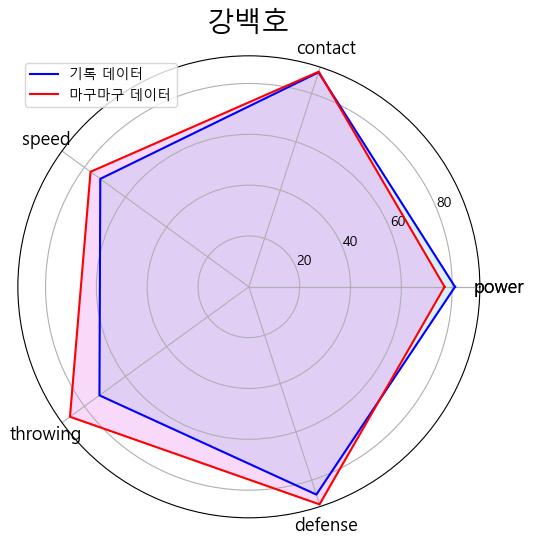

In [6]:
player_강백호= d.IFPlayer(2,157,2) # 강백호
player_강백호.draw_all()

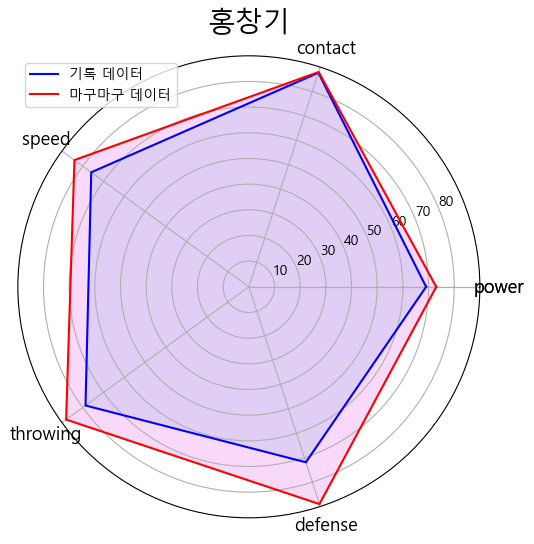

In [7]:
player_홍창기 = d.OFPlayer(0,115,0) # 홍창기
player_홍창기.draw_all()

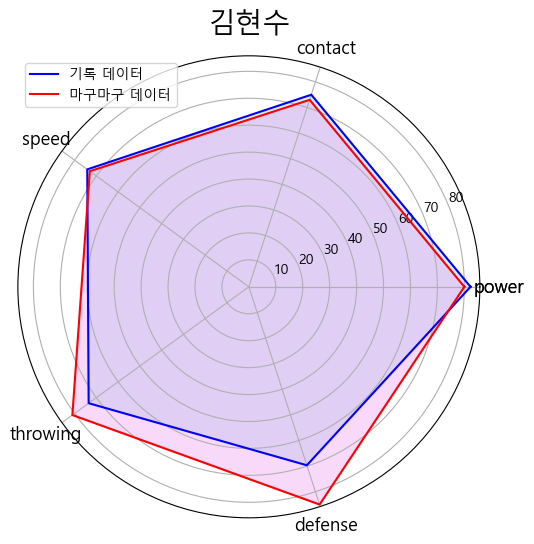

In [7]:
player_김현수 = d.OFPlayer(23,110,6) #김현수
player_김현수.draw_all()

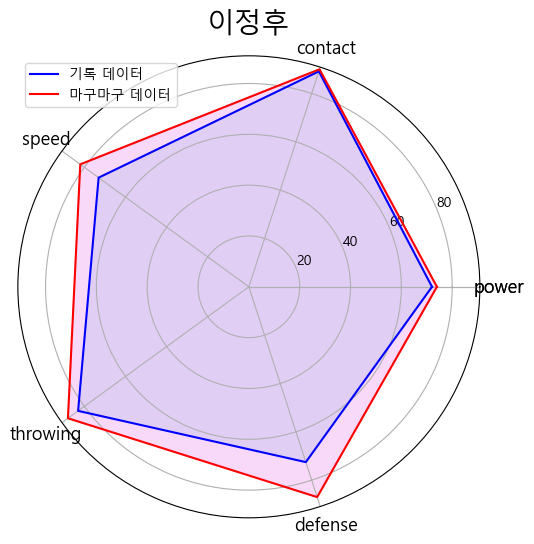

In [8]:
player_이정후 = d.OFPlayer(1,14,1) #이정후
player_이정후.draw_all()

#### 2) 성적이 유사한 선수 두 명을 비교하여 팀과의 상관성 찾기
* 분석 이유
    * 인기 팀의 경우 비 인기 팀의 경우보다 더 좋은 능력치를 부여받았을 것이라는 가설을 증명하기 위해서 해당 분석을 실행했다.
    * 인기 팀의 순위는 두산, LG, SSG, 롯데, 삼성, 키움, 기아, KT, 한화, NC 순서이다.   
* 분석 방식
    * 실제 기록이 비슷하고 내야수는 같은 포지션인 선수 두 명을 기준으로 비교를 하여 시각화 하였다
* 결과 분석
    * 황재균 vs 한동희
    * 마차도 vs 하주석
    * 나성범 vs 김재환


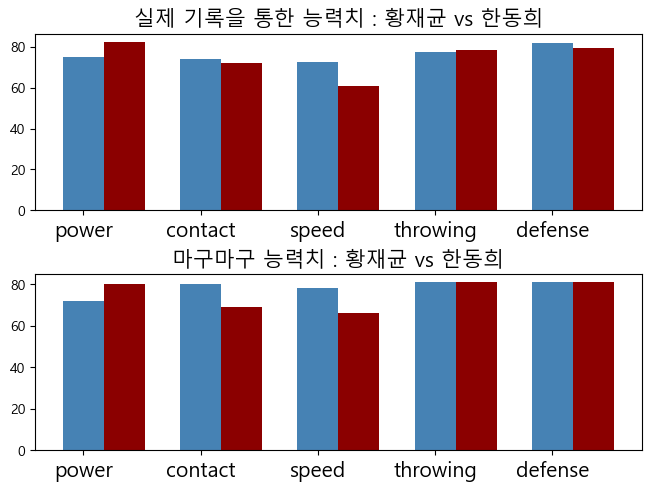

In [9]:
Compare_황재균한동희 = d.CompareIFPlayer(33,148,7,24,98,9)
Compare_황재균한동희.draw_all()

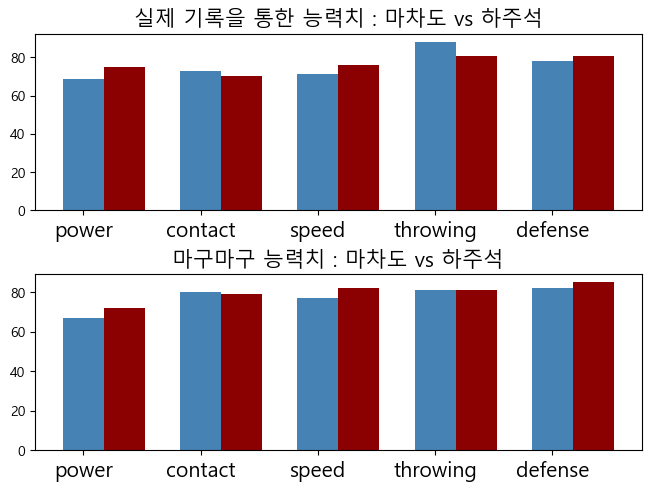

In [10]:

Compare_마차도하주석 = d.CompareIFPlayer(38,1,12,29,3,10)
Compare_마차도하주석.draw_all()

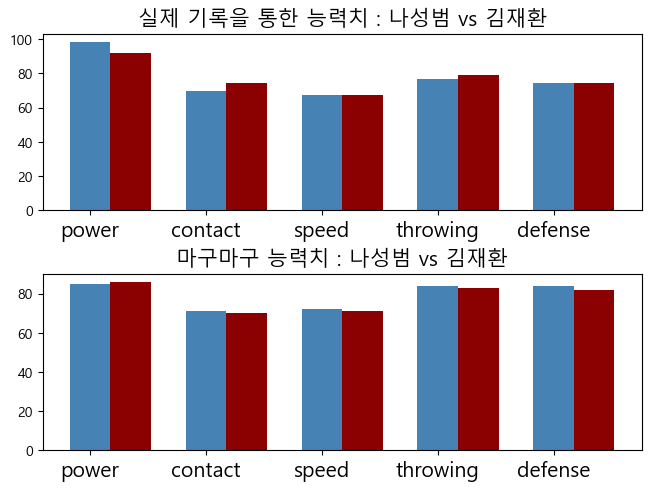

In [11]:
Compare_나성범김재환 = d.CompareOFPlayer(12,105,14, 8,124,15)
Compare_나성범김재환.draw_all()

### 6. 결론
#### 1) 실제 기록 기반 능력치와 마구마구 능력치 비교
* 전반적으로 마구마구의 능력치 분배가 실제 기록 기반 능력치보다 높은 것을 확인할 수 있었다.
* 대체로 수비쪽 능력치에서 실제 계산한 결과가 마구마구 능력치보다 많이 떨어져있는 것을 확인할 수 있었다.
* 전체적인 경향성은 실제 기록 기반 데이터와 마구마구 데이터가 유사함을 알 수 있었다.
* **가설을 증명하기에 적합한 데이터를 얻지는 못하였지만 수비능력치 측정에 있어서 좀 더 적합한 기록을 사용했다면 더 좋은 결과가 나올 수 있었을 것으로 예상된다.**
<br/><br/>

#### 2) 팀과 선수 능력치 간의 상관관계 
* **가설에 부합한 경우**
    * 나성범과 김재환을 비교한 경우 파워 능력치 측정에 있어서 가설과 부합하는 경우를 찾을 수 있었다.
        * 실제 기록 (파워 관련) => 나성범(NC) : 홈런 33개, 장타율 .509 / 김재환(두산) : 홈런 27개, 장타율 .501
        * 실제 기록을 통해 분석해 봤을 때 나성범의 능력치가 더 높게 나왔지만 마구마구 데이터에서는 김재환의 파워가 더 높게 측정되었다.
        * 인기팀 순위에서는 두산이 NC보다 높은 순위에 존재한다.
    * **파워 관련된 수치를 홈런과 장타율만 고려했기 때문에 완벽한 비교는 할 수 없었지만, 인기팀 선수의 파워 능력치가 더 높게 측정된 경우를 발견하였다.**
    <br/><br/>
* **가설에 부합하지 않은 경우**
    * 마차도와 하주석을 비교한 경우 & 한동희와 황재균을 비교한 경우
        * 스로잉을 제외한 모든 능력치가 거의 유사한 상관관계를 가지고 있었다.
<br/><br/>

### 7. 참고 문헌
* 방사형 그래프 그리기
https://blog.naver.com/breezehome50/222305541524

### 8. 첨부 파일 설명
#### 1) 데이터 파일 - data 폴더 안에 존재
* data01.txt : 선수들의 타격 기록 파일, 파워 컨텍 스피드 측정을 위해 사용
* IF.txt : 내야수의 수비 기록 파일, 내야수의 수비 스로잉 측정을 위해 사용
* OF.txt : 외야수의 수비 기록 파일, 외야수의 수비 스로잉 측정을 위해 사용
* ma9data01.txt : 마구마구 게임 내 능력치 기록 파일, 계산한 결과와 비교하기 위해 사용
* fan.txt : 프로야구 최근 10년 동안의 관중 순위 기록 파일, 인기팀 순위 측정을 위해 사용
<br/><br/>
#### 2) .py 파일 - code 폴더 안에 존재
* Calculate.py : 선수들의 기록을 기반으로 능력치를 계산
* Draw.py : 선수들의 계산된 기록을 가져와서 시각화
* Fan.py : 프로야구 관중 수 data를 통해 인기 순위를 계산
* ReadData.py : txt 파일을 읽어오는데 사용
* test.py, test02.py : 출력 결과를 확인하기 위해 test하는데 사용